In [1]:
import autograd.numpy as np
import autograd.scipy.stats.norm as norm

D = 2  # number of dimensions
log_sigma_stdev = 1.35
def log_density(x):
    mu, log_sigma = x[:, 0], x[:, 1]
    sigma_density = norm.logpdf(log_sigma, 0, log_sigma_stdev)
    mu_density = norm.logpdf(mu, 0, np.exp(log_sigma))
    return sigma_density + mu_density

In [2]:
from viabel.family import mean_field_t_variational_family
var_family = mean_field_t_variational_family(D, 40)

In [3]:
from viabel.objectives import black_box_klvi
# number of Monte Carlo samples for estimating gradients
num_mc_samples = 100   
# function that returns an unbiased estimate of the objective and its gradient
vi_objective_and_grad = black_box_klvi(var_family, log_density, num_mc_samples)

In [4]:
from viabel.optimization import adagrad_optimize
init_var_param = np.zeros(var_family.var_param_dim)
n_iters = 2500
# var_param is the estimated optimal variational parameter using iterate averaging
var_param, _, _, _ = adagrad_optimize(n_iters, vi_objective_and_grad, init_var_param, learning_rate=.01)

Average Loss = 3.6693: 100%|██████████| 2500/2500 [00:06<00:00, 378.20it/s]


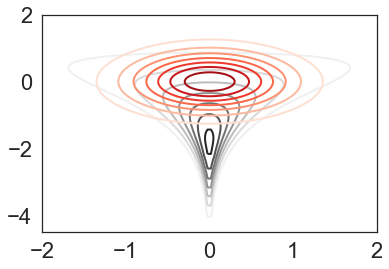

In [5]:
from experiments import plot_approx_and_exact_contours
import seaborn as sns

sns.set_style('white')
sns.set_context('notebook', font_scale=2, rc={'lines.linewidth': 2})

plot_approx_and_exact_contours(log_density, var_family, var_param, 
                               xlim=[-2, 2], ylim=[-4.5,2], savepath='funnel.png')